# 动手学深度学习(1)

课程地址：https://www.boyuai.com/elites/course/cZu18YmweLv10OeV
资源地址：https://www.boyuai.com/elites/course/cZu18YmweLv10OeV
基于pytorch实现

##  1.线性回归

使用房屋数据集进行建模，特征包括房屋的面积和房龄，输出为房屋的价格，损失函数采用平方损失函数，优化方法使用随机梯度下降

### 1.1从零实现

torch.Size([1000])
torch.Size([1000, 2])


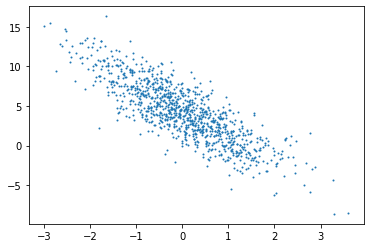

In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

#随机生成数据集
#设置输入特征数量与样本数量
num_inputs=2
num_examples=1000
#利用真实的权重和偏执生成对应的标签
true_w=[2,-3,4]
true_b=4.2
features=torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels=true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
#添加噪声
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)
#对数据进行可视化
plt.scatter(features[:,1].numpy(),labels.numpy(),1)
print(labels.shape)
print(features.shape)

In [2]:
#读取数据集
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # random read 10 samples
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # the last time may be not enough for a whole batch
        yield  features.index_select(0, j), labels.index_select(0, j)
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.3503, -0.7891],
        [ 0.4158, -0.1140],
        [-0.8204,  1.0844],
        [ 0.5934, -1.6101],
        [ 1.1703, -0.0218],
        [ 0.8503,  0.8522],
        [ 0.6622,  0.1193],
        [-0.7362,  0.2037],
        [ 0.4910, -0.3080],
        [-0.1510,  1.9247]]) 
 tensor([ 3.8606,  5.3696, -0.6965, 10.2308,  6.6187,  3.3394,  5.1524,  2.1107,
         6.1214, -1.8702])


In [3]:
#初始化模型参数
w=torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)
b=torch.zeros(1,dtype=torch.float32)
#给参数w和b赋梯度
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

#定义模型y=W*X+b
def linreg(X,w,b):
    return torch.mm(X,w)+b

#定义损失函数
def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2/2

#定义SGD优化函数
def sgd(params,lr,batch_size):
    for param in params:
        param.data-=lr*param.grad/batch_size
        
#训练，初始化学习率lr，迭代次数num_epochs
lr=0.03
num_epochs = 5
net=linreg
loss=squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        #参数梯度清零，避免累加
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l=loss(net(features,w,b),labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.026786
epoch 2, loss 0.000095
epoch 3, loss 0.000048
epoch 4, loss 0.000048
epoch 5, loss 0.000048


In [4]:
w, true_w, b, true_b

(tensor([[ 2.0002],
         [-3.0002]], requires_grad=True),
 [2, -3, 4],
 tensor([4.1995], requires_grad=True),
 4.2)

### 1.2简单实现

In [5]:
import torch
from torch import nn
import numpy as np
import torch.utils.data as Data
#生成数据
num_inputs = 2
num_examples = 1000

true_w = [2, -3.4]
true_b = 4.2

features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
batch_size = 10
# 将特征和标签组合成dataset
dataset = Data.TensorDataset(features, labels)
# 将dataset输入DataLoader
data_iter = Data.DataLoader(
    dataset=dataset,            
    batch_size=batch_size,      
    shuffle=True,               # 是否捣乱数据
    num_workers=2,              # 多线程读取数据
)
for X, y in data_iter:
    print(X, '\n', y)
    break

tensor([[-0.5461,  0.1822],
        [-0.3892,  0.3422],
        [-1.1618, -0.2895],
        [ 0.6008, -1.1407],
        [-0.1354, -0.9512],
        [ 0.8827,  1.4615],
        [-0.6715,  0.9073],
        [ 0.6681, -0.2326],
        [-0.1517,  0.4691],
        [ 0.2303,  1.7655]]) 
 tensor([ 2.4840,  2.2525,  2.8591,  9.2632,  7.1861,  0.9929, -0.2172,  6.3230,
         2.3050, -1.3411])


In [6]:
#定义模型
class LinearNet(nn.Module):
    def __init__(self,n_feature):
        super(LinearNet,self).__init__()
        self.linear=nn.Linear(n_feature,1)    #函数原型
    def forward(self,x):
        y=self.linear(x)
        return y
net=LinearNet(num_inputs)
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [7]:
#初始化模型
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
#初始化参数
from torch.nn import init
init.normal_(net[0].weight,mean=0.0,std=0.01)
init.constant_(net[0].bias,val=0.0)
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0007, -0.0073]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [8]:
#定义均方差损失函数
loss=nn.MSELoss()
#定义优化函数
import torch.optim as optim
optimizer=optim.SGD(net.parameters(),lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [9]:
#训练
num_epochs=3
for epoch in range(1,num_epochs+1):
    for X,y in data_iter:
        output=net(X)
        l=loss(output,y.view(-1,1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))
#结果比较
dense = net[0]
print(true_w, dense.weight.data)
print(true_b, dense.bias.data)

epoch 1, loss: 0.000410
epoch 2, loss: 0.000112
epoch 3, loss: 0.000090
[2, -3.4] tensor([[ 1.9995, -3.4009]])
4.2 tensor([4.1997])


## 2.softmax和分类模型

使用MNIST数据集进行多分类，交叉熵损失函数

### 2.1 加载数据

pytorch中主要包括：
(1) torchvision.datasets：包含一些加载数据的函数及常用的数据集接口
(2) torchvision.models：包含常用的模型结构(预训练模型)
(3) torchvision.utils：包含常用的图片变换方法，如裁剪、旋转等
(4) torchvision.utils：其他方法

In [21]:
# import needed package
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import time
import sys
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels
X_train, y_train = load_mnist('C:/Users/wangk/Desktop/DIVE_INTO_DEEP_LEARNING', kind='train')
X_test, y_test = load_mnist('C:/Users/wangk/Desktop/DIVE_INTO_DEEP_LEARNING', kind='t10k')

batch_size = 256

#转换数据
X_train = torch.tensor(X_train.reshape(60000,28,28), dtype=torch.float)
X_test = torch.tensor(X_test.reshape(10000,28,28), dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)
dataset_train = torch.utils.data.TensorDataset(X_train, y_train)
train_iter = torch.utils.data.DataLoader(dataset_train, batch_size, shuffle=True)
dataset_test = torch.utils.data.TensorDataset(X_test, y_test)
test_iter = torch.utils.data.DataLoader(dataset_test, batch_size, shuffle=True)

### 2.2 softmax从零实现

In [34]:
import torch
import torchvision
import numpy as np
import sys
#初始化参数
#28*28像素图像
num_inputs=784
#10个类别
num_outputs = 10
#权重和偏置
W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float)
b = torch.zeros(num_outputs, dtype=torch.float)
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [36]:
#定义softmax
def softmax(X):
    X_exp=X.exp()
    patition=X_exp.sum(dim=1,keepdim=True)
    return X_exp/patition
#定义模型
#X.view（）函数将X进行拉伸，(-1,n)拉伸为列，（-n,1)拉伸为行
def net(X):
    return softmax(torch.mm(X.view((-1, num_inputs)), W) + b)
#定义损失函数
def cross_entropy(y_hat,y):
    return - torch.log(y_hat.gather(1,y.view(-1,1)))
#定义模型准确率
def accuracy(y_hat,y):
    return (y_hat.argmax(dim=1)==y).float().mean().item()
def evaluate_accuracy(data_iter,net):
    acc_sum,n=0.0,0
    for X,y in data_iter:
        acc_sum+=(net(X).argmax(dim=1) == y).float().sum().item()
        n+=y.shape[0]
    return acc_sum/n
#定义优化函数
def sgd(params,lr,batch_size):
    for param in params:
        param.data-=lr*param.grad/batch_size
        
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
def show_fashion_mnist(images, labels):
    #d2l.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

        
#模型训练
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            if optimizer is None:
                sgd(params, lr, batch_size)
            else:
                optimizer.step() 
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

#模型预测
X, y = iter(test_iter).next()
true_labels = get_fashion_mnist_labels(y.numpy())
pred_labels = get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

epoch 1, loss nan, train acc 0.100, test acc 0.100
epoch 2, loss nan, train acc 0.100, test acc 0.100
epoch 3, loss nan, train acc 0.100, test acc 0.100
epoch 4, loss nan, train acc 0.100, test acc 0.100
epoch 5, loss nan, train acc 0.100, test acc 0.100


### 2.3简洁实现 

In [28]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import sys


#定义模型
num_inputs=784
num_outputs=10
class LinearNet(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super(Linear,self).__init__()
        self.linear=nn.Linear(num_inputs,num_outputs)
    def forward(self,x):
        y=self.linear(x.view(x.shape[0],-1))
        return y
#将图片铺平
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer,self).__init__()
    def forward(self,x):
        return x.view(x.shape[0],-1)
from collections import OrderedDict
net = nn.Sequential(
        # FlattenLayer(),
        # LinearNet(num_inputs, num_outputs) 
        OrderedDict([
           ('flatten', FlattenLayer()),
           ('linear', nn.Linear(num_inputs, num_outputs))]))
#初始化模型参数
init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0)
#定义损失函数
loss=nn.CrossEntropyLoss()
#定义优化器
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)


In [29]:
num_epochs = 5
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 95.3254, train acc 0.679, test acc 0.684
epoch 2, loss 49.0642, train acc 0.753, test acc 0.739
epoch 3, loss 46.2734, train acc 0.763, test acc 0.640
epoch 4, loss 46.3941, train acc 0.765, test acc 0.748
epoch 5, loss 41.8360, train acc 0.778, test acc 0.721


## 3.MLP

仍使用FashionMinist

### 3.1从零实现

In [30]:
#加载数据
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels
X_train, y_train = load_mnist('C:/Users/wangk/Desktop/DIVE_INTO_DEEP_LEARNING', kind='train')
X_test, y_test = load_mnist('C:/Users/wangk/Desktop/DIVE_INTO_DEEP_LEARNING', kind='t10k')

batch_size = 256

#转换数据
X_train = torch.tensor(X_train.reshape(60000,28,28), dtype=torch.float)
X_test = torch.tensor(X_test.reshape(10000,28,28), dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)
dataset_train = torch.utils.data.TensorDataset(X_train, y_train)
train_iter = torch.utils.data.DataLoader(dataset_train, batch_size, shuffle=True)
dataset_test = torch.utils.data.TensorDataset(X_test, y_test)
test_iter = torch.utils.data.DataLoader(dataset_test, batch_size, shuffle=True)
print(y_train.shape)

torch.Size([60000])


In [31]:
import torch
import numpy as np
import sys

#定义模型参数
num_inputs,numputs,num_hiddens=784,10,256
W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)
params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)
#定义激活函数
def relu(X):
    return torch.max(input=X,other=torch.tensor(0.0))
#定义模型
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2
#定义损失函数
loss = torch.nn.CrossEntropyLoss()
#定义优化函数
def sgd(params,lr,batch_size):
    for param in params:
        param.data-=lr*param.grad/batch_size
#定义模型准确率
def accuracy(y_hat,y):
    return (y_hat.argmax(dim=1)==y).float().mean().item()
def evaluate_accuracy(data_iter,net):
    acc_sum,n=0.0,0
    for X,y in data_iter:
        acc_sum+=(net(X).argmax(dim=1) == y).float().sum().item()
        n+=y.shape[0]
    return acc_sum/n
#训练
num_epochs, lr = 5, 100.0
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            if optimizer is None:
                sgd(params, lr, batch_size)
            else:
                optimizer.step() 
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 10563564.3088, train acc 0.099, test acc 0.100
epoch 2, loss 0.0090, train acc 0.100, test acc 0.100
epoch 3, loss 0.0090, train acc 0.097, test acc 0.100
epoch 4, loss 0.0090, train acc 0.099, test acc 0.100
epoch 5, loss 0.0090, train acc 0.100, test acc 0.100


### 3.2简洁实现


In [32]:
#加载数据
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels
X_train, y_train = load_mnist('C:/Users/wangk/Desktop/DIVE_INTO_DEEP_LEARNING', kind='train')
X_test, y_test = load_mnist('C:/Users/wangk/Desktop/DIVE_INTO_DEEP_LEARNING', kind='t10k')

batch_size = 256

#转换数据
X_train = torch.tensor(X_train.reshape(60000,28,28), dtype=torch.float)
X_test = torch.tensor(X_test.reshape(10000,28,28), dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)
dataset_train = torch.utils.data.TensorDataset(X_train, y_train)
train_iter = torch.utils.data.DataLoader(dataset_train, batch_size, shuffle=True)
dataset_test = torch.utils.data.TensorDataset(X_test, y_test)
test_iter = torch.utils.data.DataLoader(dataset_test, batch_size, shuffle=True)

In [33]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import sys

def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            if optimizer is None:
                sgd(params, lr, batch_size)
            else:
                optimizer.step() 
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))


class LinearNet(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super(Linear,self).__init__()
        self.linear=nn.Linear(num_inputs,num_outputs)
    def forward(self,x):
        y=self.linear(x.view(x.shape[0],-1))
        return y
#将图片铺平
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer,self).__init__()
    def forward(self,x):
        return x.view(x.shape[0],-1)

num_inputs, num_outputs, num_hiddens = 784, 10, 256
    
net = nn.Sequential(
        FlattenLayer(),
        nn.Linear(num_inputs, num_hiddens),
        nn.ReLU(),
        nn.Linear(num_hiddens, num_outputs), 
        )

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
#初始化参数    
for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)
#训练仍使用前述train_ch3函数
num_epochs = 5
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)


epoch 1, loss 153078.0437, train acc 0.101, test acc 0.100
epoch 2, loss 0.0090, train acc 0.099, test acc 0.100
epoch 3, loss 0.0090, train acc 0.100, test acc 0.100
epoch 4, loss 0.0090, train acc 0.098, test acc 0.100
epoch 5, loss 0.0090, train acc 0.098, test acc 0.100
